<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_AI-Model-Operations-MLOps/blob/main/week04/Introduction_to_Fast_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import joblib
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# 1. Í∞ÄÏÉÅÏùò ÌöåÍ∑Ä Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X, y = make_regression(
    n_samples=50,
    n_features=1,
    noise=10,
    random_state=42
)

# 2. ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# 3. Î™®Îç∏ Ï†ÄÏû•
joblib.dump(model, 'regression_model.pkl')
print("Î™®Îç∏Ïù¥ 'regression_model.pkl' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

Î™®Îç∏Ïù¥ 'regression_model.pkl' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (XÏùò Ï≤´ Î≤àÏß∏ ÌäπÏÑ±Í≥º yÏùò Í¥ÄÍ≥Ñ)
plt.figure(figsize=(10, 6))
sns.regplot(x=X[:, 0], y=y) # Add regression line
plt.title('Relationship between X (Feature 1) and y with Regression Line')
plt.xlabel('X (Feature 1)')
plt.ylabel('y')
plt.grid(True)
plt.show()

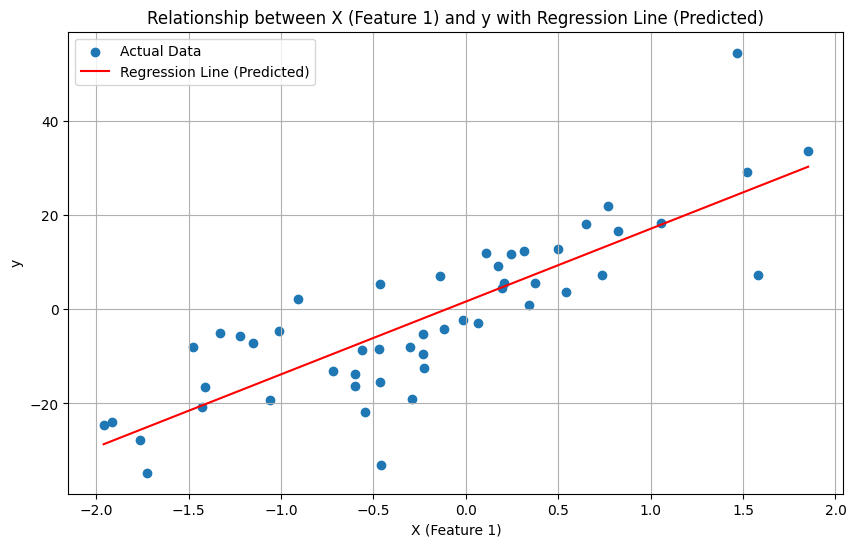

In [25]:
import numpy as np

# 5. Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌöåÍ∑ÄÏÑ† ÏãúÍ∞ÅÌôî
# XÏùò Î≤îÏúÑÎ•º ÏÉùÏÑ±
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Î™®Îç∏Î°ú ÏòàÏ∏°
y_pred = model.predict(X_range)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, label='Actual Data') # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞
plt.plot(X_range, y_pred, color='red', label='Regression Line (Predicted)') # ÌöåÍ∑ÄÏÑ†
plt.title('Relationship between X (Feature 1) and y with Regression Line (Predicted)')
plt.xlabel('X (Feature 1)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Load the trained model

### Subtask:
Load the previously saved `regression_model.pkl` using `joblib`.


**Reasoning**:
Load the previously saved model using joblib.



In [27]:
# 2. Î™®Îç∏ Î°úÎìú
# Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖò ÏãúÏûë Ïãú Ìïú Î≤àÎßå Î™®Îç∏ÏùÑ Î°úÎìúÌïòÏó¨ Ìö®Ïú®ÏÑ±ÏùÑ ÎÜíÏûÖÎãàÎã§.
try:
    model = joblib.load("regression_model.pkl")
    print("Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ!")
except FileNotFoundError:
    raise RuntimeError("Î™®Îç∏ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. 'train_model.py'Î•º Î®ºÏ†Ä Ïã§ÌñâÌïòÏó¨ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.")


Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ!


In [28]:
# 3. ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ï†ïÏùò
# PydanticÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÏôÄ ÌÉÄÏûÖÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
class RegressionInput(BaseModel):
    features: list[float]


In [30]:
import uvicorn
import nest_asyncio
from fastapi import FastAPI
from pyngrok import ngrok
import threading
import time

## Define fastapi application

### Subtask:
Create a FastAPI instance and define a Pydantic model for the input data.


In [ ]:

from google.colab import userdata
your_auth_token_here = userdata.get('ngrok')

# 1. FastAPI Ïï± Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
app = FastAPI(
    title="ÌöåÍ∑Ä ÏòàÏ∏° ÏÑúÎπÑÏä§ API",
    description="Scikit-learn Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú ÌöåÍ∑Ä ÏòàÏ∏° API"
)


ngrok.set_auth_token(your_auth_token_here)

# 4. ÏòàÏ∏° API ÏóîÎìúÌè¨Ïù∏Ìä∏ Ï†ïÏùò
@app.post("/predict")
def predict_regression(data: RegressionInput):
    """
    ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•Î∞õÏïÑ ÌöåÍ∑Ä Í∞íÏùÑ ÏòàÏ∏°Ìï©ÎãàÎã§.
    - **data**: ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† 1Í∞úÏùò ÌäπÏÑ±(features) Î¶¨Ïä§Ìä∏
    """
    # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
    input_data = np.array(data.features).reshape(1, -1)

    # Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°
    prediction = model.predict(input_data)

    # ÏòàÏ∏° Í≤∞Í≥ºÎ•º JSON ÌòïÌÉúÎ°ú Î∞òÌôò
    return {"prediction": prediction.tolist()[0]}


# Uvicorn ÏÑúÎ≤ÑÎ•º ÎπÑÎèôÍ∏∞Ï†ÅÏúºÎ°ú Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú ÏÑ§Ï†ï
nest_asyncio.apply()

def run_server():
    """Î≥ÑÎèÑ Ïä§Î†àÎìúÏóêÏÑú FastAPI ÏÑúÎ≤Ñ Ïã§Ìñâ"""
    print("FastAPI ÏÑúÎ≤ÑÎ•º ÏãúÏûëÌï©ÎãàÎã§...")
    uvicorn.run(app, host="0.0.0.0", port=8000, log_level="info", reload=False)

def setup_ngrok():
    """ngrok ÌÑ∞ÎÑê ÏÑ§Ï†ï"""
    try:
        # ngrok authtoken ÏÑ§Ï†ï (ÌïÑÏöîÌïú Í≤ΩÏö∞)
        # ngrok.set_auth_token("your_auth_token_here")  # Ïã§Ï†ú ÌÜ†ÌÅ∞ÏúºÎ°ú ÍµêÏ≤¥ÌïòÏÑ∏Ïöî

        print("ngrok ÌÑ∞ÎÑêÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...")

        # ngrok ÌÑ∞ÎÑê ÏÉùÏÑ±
        public_url = ngrok.connect(8000, "http")

        print("=" * 50)
        print(f"üéâ ÏÑ±Í≥µ! Ïô∏Î∂ÄÏóêÏÑú Ï†ëÍ∑º Í∞ÄÎä•Ìïú URL: {public_url}")
        print("=" * 50)
        print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏóîÎìúÌè¨Ïù∏Ìä∏:")
        print(f"  ‚Ä¢ ÌôàÌéòÏù¥ÏßÄ: {public_url}/")
        print(f"  ‚Ä¢ Ìó¨Ïä§Ï≤¥ÌÅ¨: {public_url}/health")
        print(f"  ‚Ä¢ API Î¨∏ÏÑú: {public_url}/docs")
        print(f"  ‚Ä¢ ReDoc: {public_url}/redoc")
        print("=" * 50)

        return public_url

    except Exception as e:
        print(f"ngrok ÏÑ§Ï†ï Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        print("\nÌï¥Í≤∞ Î∞©Î≤ï:")
        print("1. ngrok Í≥ÑÏ†ïÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî (https://ngrok.com/)")
        print("2. authtokenÏùÑ ÏÑ§Ï†ïÌïòÏÑ∏Ïöî:")
        print("   ngrok.set_auth_token('your_token_here')")
        print("3. ÎòêÎäî Lightning AIÏùò Ìè¨Ìä∏ Ìè¨ÏõåÎî©ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî")
        return None

if __name__ == "__main__":
    # ÏÑúÎ≤ÑÎ•º Î≥ÑÎèÑ Ïä§Î†àÎìúÏóêÏÑú ÏãúÏûë
    server_thread = threading.Thread(target=run_server, daemon=True)
    server_thread.start()

    # ÏÑúÎ≤ÑÍ∞Ä ÏãúÏûëÎê† ÎïåÍπåÏßÄ Ïû†Ïãú ÎåÄÍ∏∞
    print("ÏÑúÎ≤Ñ ÏãúÏûëÏùÑ Í∏∞Îã§Î¶¨Îäî Ï§ë...")
    time.sleep(3)

    # ngrok ÌÑ∞ÎÑê ÏÑ§Ï†ï
    public_url = setup_ngrok()

    if public_url:
        print(f"\nÏÑúÎ≤ÑÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ïã§ÌñâÎêòÏóàÏäµÎãàÎã§!")
        print("ÏÑúÎ≤ÑÎ•º Ï§ëÏßÄÌïòÎ†§Î©¥ Ctrl+CÎ•º ÎàÑÎ•¥ÏÑ∏Ïöî...")

        try:
            # ÏÑúÎ≤ÑÍ∞Ä Í≥ÑÏÜç Ïã§ÌñâÎêòÎèÑÎ°ù Ïú†ÏßÄ
            server_thread.join()
        except KeyboardInterrupt:
            print("\nÏÑúÎ≤ÑÎ•º Ï¢ÖÎ£åÌï©ÎãàÎã§...")
            ngrok.disconnect(public_url)
            ngrok.kill()
    else:
        print("\nngrok ÏÑ§Ï†ïÏóê Ïã§Ìå®ÌñàÏäµÎãàÎã§. Lightning AI Ìè¨Ìä∏ Ìè¨ÏõåÎî©ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.")
        print("Ìè¨Ìä∏ 8000Ïù¥ Ìè¨ÏõåÎî©ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

FastAPI ÏÑúÎ≤ÑÎ•º ÏãúÏûëÌï©ÎãàÎã§...ÏÑúÎ≤Ñ ÏãúÏûëÏùÑ Í∏∞Îã§Î¶¨Îäî Ï§ë...



INFO:     Started server process [175]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


ngrok ÌÑ∞ÎÑêÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...
üéâ ÏÑ±Í≥µ! Ïô∏Î∂ÄÏóêÏÑú Ï†ëÍ∑º Í∞ÄÎä•Ìïú URL: NgrokTunnel: "https://b99c2ffed4f2.ngrok-free.app" -> "http://localhost:8000"
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏóîÎìúÌè¨Ïù∏Ìä∏:
  ‚Ä¢ ÌôàÌéòÏù¥ÏßÄ: NgrokTunnel: "https://b99c2ffed4f2.ngrok-free.app" -> "http://localhost:8000"/
  ‚Ä¢ Ìó¨Ïä§Ï≤¥ÌÅ¨: NgrokTunnel: "https://b99c2ffed4f2.ngrok-free.app" -> "http://localhost:8000"/health
  ‚Ä¢ API Î¨∏ÏÑú: NgrokTunnel: "https://b99c2ffed4f2.ngrok-free.app" -> "http://localhost:8000"/docs
  ‚Ä¢ ReDoc: NgrokTunnel: "https://b99c2ffed4f2.ngrok-free.app" -> "http://localhost:8000"/redoc

ÏÑúÎ≤ÑÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ïã§ÌñâÎêòÏóàÏäµÎãàÎã§!
ÏÑúÎ≤ÑÎ•º Ï§ëÏßÄÌïòÎ†§Î©¥ Ctrl+CÎ•º ÎàÑÎ•¥ÏÑ∏Ïöî...
INFO:     220.90.109.11:0 - "GET / HTTP/1.1" 404 Not Found


INFO:     220.90.109.11:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     220.90.109.11:0 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     220.90.109.11:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     220.90.109.11:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     220.90.109.11:0 - "POST /predict HTTP/1.1" 200 OK
